# Name Enderas Teferi
# ID UGR/13792/14

## TITLE Predicting Cancer Survival Rate

## Cancer prediction 

This model will work on predicting the cancer cell is benign or malignant based on the given data set.

we use Classification model and from this model we choose support vector machine type .In this code blocks I will be using the concept of Support Vector Machines (SVM) to create a svm model to predict weather the cell is benign or malignant.

## Problem definition Classification

The project involve developing a predictive model to classify whether a patient is likely to have cancer or not based on various medical parameters and diagonostics testing using classification techniques

## Data


Various information from well-known cancer registries and health care institutions were collected from the Internet

### evaluation 
we evaluate this model as  85% efficent and effective

### Features

This data dictionary provides detailed information about the dataset of "cell_samples.csv".And additionally include Tumor Characteristics (if applicable)
   - Tumor size
   - Tumor sta
   - MargAdh
   - BareNucge
   - Histological subtypes

### import the library
Pandas for data analysis.

NumPy for numerical operating.

Matplotlib / seaborn for plotting or data visualization.

Scikit-learn for machine learning modelling and evaluations.  


## load data

import the dataset into the notebook for analysis and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("cell_samples.csv")

In [3]:
dataset

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<Axes: xlabel='Clump', ylabel='UnifSize'>

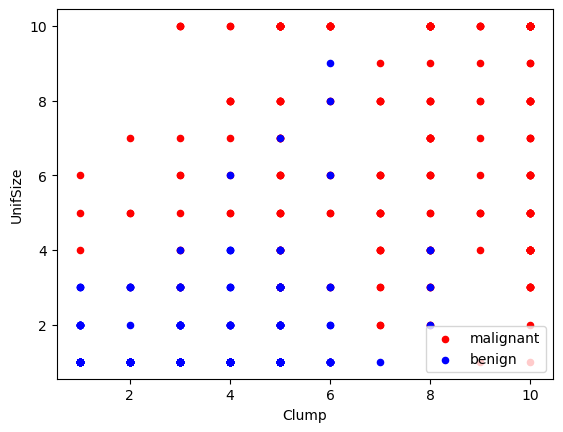

In [5]:
malig = dataset[dataset["Class"]==4].plot(kind="scatter",x="Clump", y="UnifSize", color="red",label="malignant")
dataset[dataset["Class"]==2].plot(kind="scatter",x="Clump", y="UnifSize", color="blue",label="benign",ax=malig)

In [6]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

<Axes: >

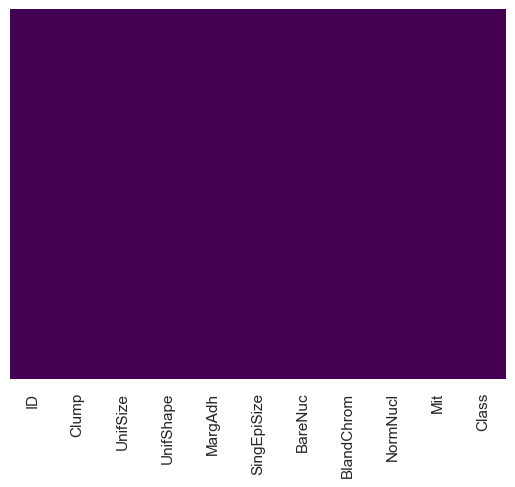

In [7]:
import seaborn as sns
sns.set()

#It will give a graph to show weather we have any cloumn with nan values or not.
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap="viridis")

## Data Preprocessing and Data exploration

we try to answer the question predicting the cancer cell is benign or malignant based on the given data set.In this dataset we have some rows in BareNuc which is empty so we will be dropping those rows from the column BareNuc from the dataset. And by using the concept of list comprehension checking weather still do we have any null values or not. As per my code empty list [] means there is no null values in that column as you can see below in the code.

In [8]:
dataset = dataset[pd.to_numeric(dataset["BareNuc"], errors="coerce").notnull()]

In [9]:
BareNuc = [i for i in dataset["BareNuc"].isnull() if i==True]

In [10]:
BareNuc

[]

In [11]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [12]:
dataset.loc[:, "BareNuc"] = dataset["BareNuc"].astype("int")

In [13]:
dataset.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
X = dataset[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]

In [15]:
y = dataset["Class"]

## Trainng and test split

This is the next step after the data preprocessing are identified. to do this import the train_test_split from the sklearn.model_section library and pass the x,y parameters

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
print("Training Data Shape is :", X_train.shape, y_train.shape)
print("Testing data Shape is :", X_test.shape, y_test.shape) 

Training Data Shape is : (457, 9) (457,)
Testing data Shape is : (226, 9) (226,)


## SVM Model Creation 

Created a SVM model for prediction and each time SVM model I have created by using different kernel functions just to check weather which function is better for this dataset. After creating the model in next cell storing the prediction into the variables and then in next cell printing the accuracy score of all the models created by using different kernel functions. We can observe we got almost 95% accuracy in all the function except Sigmoid function, so we can use any of the three functions for prediction by using this dataset. 

## Feature importance


Feature importance analysis is a crucial aspect of understanding the factors that significantly contribute to the predictive performance of in cancer prediction. By identifying which features have the most substantial influence on the model's outcomes, we can gain valuable insights into the underlying factors driving the predictions and potentially uncover important biomarkers or risk factors for cancerc.

Methodol

1. Feature Selection: Before conducting feature importance analysis, a comprehensive set of features related to patient demographics, medical history, genetic markers, biomarkers, and other relevant data was coeas.

2. Model Training: The AI model utilized for cancer prediction was trained using a suitable algorithm such as logistic regression, random forest, support vector machines, or deep learningvses.

3. Feature Importance Clculation: Post-training, the feature importance analysis involved assessing the impact of each input feature on the model's predictive pimportance.

In [18]:
from sklearn import svm
model1 = svm.SVC(kernel="rbf")
model1.fit(X_train,y_train)

model2 = svm.SVC(kernel="linear")
model2.fit(X_train,y_train)

model3 = svm.SVC(kernel="poly")
model3.fit(X_train,y_train)

model4 = svm.SVC(kernel="sigmoid")
model4.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [19]:
rbfpred = model1.predict(X_test)
linearpred = model2.predict(X_test)
polypred = model3.predict(X_test)
sigmoidpred = model4.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy of model by rbf func. is",accuracy_score(rbfpred,y_test))
print("Accuracy of model by linear func. is",accuracy_score(linearpred,y_test))
print("Accuracy of model by polynomial func is",accuracy_score(polypred,y_test))
print("Accuracy of model by sigmoid func is",accuracy_score(sigmoidpred,y_test))

Accuracy of model by rbf func. is 0.9513274336283186
Accuracy of model by linear func. is 0.9557522123893806
Accuracy of model by polynomial func is 0.9513274336283186
Accuracy of model by sigmoid func is 0.4469026548672566


In [21]:
from sklearn.metrics import f1_score
print("Accuracy of model by rbf func. is", f1_score(y_test, rbfpred, average='weighted'))
print("Accuracy of model by linear func. is", f1_score(y_test, linearpred, average='weighted'))
print("Accuracy of model by polynomial func. is", f1_score(y_test, polypred, average='weighted'))
print("Accuracy of model by sigmoid func. is", f1_score(y_test, sigmoidpred, average='weighted'))

Accuracy of model by rbf func. is 0.9510019648358443
Accuracy of model by linear func. is 0.9553905446490127
Accuracy of model by polynomial func. is 0.9508547432332553
Accuracy of model by sigmoid func. is 0.38813563908960513


In [12]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data

# Split the dataset into a training set and a test set
x_test, x_train, y_test, y_train = train_test_split(X, iris.target, test_size=0.2, random_state=42)

# Load the model from the pickle file
loaded_model = pickle.load(open("dataset_svm_1.pkl", "rb"))

# Now you can use x_test to make predictions
predictions = loaded_model.predict(x_test)

In [13]:
import pickle

In [17]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pickle.dump(model1, open("dataset_svm_1.pkl", "wb"))

In [18]:
pickle.dump(model1, open("dataset_svm_1.pkl", "wb"))

In [19]:
pickle.load(open("dataset_svm_1.pkl", "rb"))

SVC(C=1, kernel='linear')

In [20]:
loaded_model = pickle.load(open("dataset_svm_1.pkl", "rb"))

In [23]:
loaded_model.predict(x_test)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [24]:
loaded_model.score(x_test, y_test)

0.975